# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets
import requests
import time


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

print("***************************************************************************************")
# df.head(n).to_csv('yourfileout.csv', encoding='utf-8')
# city_logging.info('dataframe head - {}'.format(cities.head()))
print("Do I need to include logging in addition to wrting out the .csv???")
print("***************************************************************************************")
    
# Print the city count to confirm sufficient count
print(len(cities))
print(cities)
print("*******************************************************************************************")
print("Temporarily reducging cities from cities to cities[0:10] so only get 10 cities intially")
print("before calling api.openweathermap.org since they have limits") 
print("I believe 60 calls/minute and 1M calls/month per month)")
cities = cities[0:10]
print("*******************************************************************************************")
print(cities)

***************************************************************************************
Do I need to include logging in addition to wrting out the .csv???
***************************************************************************************
616
['avera', 'alcaniz', 'hamilton', 'sechura', 'barrow', 'tabas', 'taolanaro', 'lebu', 'narsaq', 'kaduy', 'yeppoon', 'mataura', 'katobu', 'suining', 'souillac', 'provideniya', 'hobart', 'udachnyy', 'hithadhoo', 'port elizabeth', 'alofi', 'ilulissat', 'hasaki', 'kloulklubed', 'cape town', 'ilo', 'sitka', 'whitehorse', 'hovd', 'rikitea', 'khatanga', 'busselton', 'butaritari', 'gat', 'houma', 'nizhneyansk', 'meyungs', 'bowen', 'buraydah', 'ketchikan', 'warqla', 'vaini', 'san cristobal', 'mahebourg', 'hermanus', 'bredasdorp', 'gondanglegi', 'saint george', 'puerto ayora', 'torbay', 'port alfred', 'atuona', 'bambous virieux', 'yellowknife', 'lasa', 'mount isa', 'samusu', 'verkhnyaya inta', 'volot', 'castro', 'bluff', 'amderma', 'ituni', 'itaberaba', '

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# set up lists to hold reponse info
lat = []
lon = []
temp = []
temp_max = []
humidity=[]
clouds=[]
wind=[]
del_cities = []
del_cities_index = []
i = 0
city_counter=0

print("cities")
print(cities)
# Loop through the list of cities and perform a request for data on each
for city in cities:
    print(f'city is {city}')
    try:
        response = requests.get(query_url + city).json()
        time.sleep(0.05)
        lat.append(response['coord']['lat'])
        print(f"The latitude information for city {city} #{city_counter} received is: {lat}")
        lon.append(response['coord']['lon'])
        print(f"The longitude information for city {city} #{city_counter} received is: {lon}")
        temp.append(response['main']['temp'])
        print(f"The temperature information for city {city} #{city_counter} received is: {temp}")
        temp_max.append(response['main']['temp_max'])
        print(f"The temperature Maximum information for city {city} #{city_counter} received is: {temp_max}")
        humidity.append(response['main']['humidity'])
        print(f"The humidty information for city {city} #{city_counter} received is: {humidity}")
        clouds.append(response['clouds']['all'])
        print(f"The cloudiness information for city {city} #{city_counter} received is: {clouds}")
        wind.append(response['wind']['speed'])
        print(f"The windiness information for city {city} #{city_counter} received is: {wind}")
        
    except KeyError:
        print()
        print("Oops!  That might not be a valid data point.  Try again... and later remove the invalid city(s) from cities")
        print(f'Issue with {city} of index {city_counter}')
        del_cities_index.append(city_counter)
        print('len(del_cities_index)')
        print(len(del_cities_index))        
        
    city_counter+=1
if len(del_cities_index)>0:
    for i in range(0, len(del_cities_index)):
        print(f'the value of i is {i}')
        print(f'Deleting {del_cities_index}[{i}]')
        del cities[int(del_cities_index[i])]  

# from the list
print(f'cities is now {cities}')
print()
    
# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city  

# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
print(f"The weather API responded with: {weather_json}.")

cities
['avera', 'alcaniz', 'hamilton', 'sechura', 'barrow', 'tabas', 'lebu', 'narsaq', 'kaduy']
city is avera
The latitude information for city avera #0 received is: [33.194]
The longitude information for city avera #0 received is: [-82.5271]
The temperature information for city avera #0 received is: [15.49]
The temperature Maximum information for city avera #0 received is: [17.08]
The humidty information for city avera #0 received is: [33]
The cloudiness information for city avera #0 received is: [0]
The windiness information for city avera #0 received is: [3.17]
city is alcaniz
The latitude information for city alcaniz #1 received is: [33.194, 41.05]
The longitude information for city alcaniz #1 received is: [-82.5271, -0.1333]
The temperature information for city alcaniz #1 received is: [15.49, 7.58]
The temperature Maximum information for city alcaniz #1 received is: [17.08, 7.82]
The humidty information for city alcaniz #1 received is: [33, 72]
The cloudiness information for city

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

 # create a data frame from cities, lat, temp, etc
print(f'City {cities}')
print(f'Lat {lat}')
      
#     "lat": lat,
#     "lon": lon,
#     "temp": temp,
#     "TempMax": temp_max,
#     "Humidity": humidity,
#     "Cloudiness": clouds,
#     "Wind Speed":wind 
#       ")
weather_dict = {
    "city": cities,
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "TempMax": temp_max,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed":wind 
}

print("weather_dict")
print(weather_dict)
print()

weather_data = pd.DataFrame(weather_dict)
print(weather_data)

# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
weather_data.to_csv(output_data_file, encoding="utf-8", index=False)

City ['avera', 'alcaniz', 'hamilton', 'sechura', 'barrow', 'tabas', 'lebu', 'narsaq', 'kaduy']
Lat [33.194, 41.05, 39.1834, -5.5569, 71.2906, 33.5959, -37.6167, 60.9167, 59.2]
weather_dict
{'city': ['avera', 'alcaniz', 'hamilton', 'sechura', 'barrow', 'tabas', 'lebu', 'narsaq', 'kaduy'], 'lat': [33.194, 41.05, 39.1834, -5.5569, 71.2906, 33.5959, -37.6167, 60.9167, 59.2], 'lon': [-82.5271, -0.1333, -84.5333, -80.8222, -156.7887, 56.9244, -73.65, -46.05, 37.15], 'temp': [15.49, 7.58, 10.37, 27.2, -30.99, 11.54, 17.53, -8.88, -0.98], 'TempMax': [17.08, 7.82, 11.6, 27.2, -30.99, 11.54, 17.53, -8.88, -0.98], 'Humidity': [33, 72, 52, 54, 69, 27, 66, 73, 96], 'Cloudiness': [0, 0, 0, 100, 0, 2, 0, 86, 100], 'Wind Speed': [3.17, 1.31, 5.66, 6.84, 6.69, 2.81, 9.78, 4.06, 2.26]}

       city      lat       lon   temp  TempMax  Humidity  Cloudiness  \
0     avera  33.1940  -82.5271  15.49    17.08        33           0   
1   alcaniz  41.0500   -0.1333   7.58     7.82        72           0   
2  h

In [21]:
# Display the DataFrame
weather_data

,city,lat,lon,temp,TempMax,Humidity,Cloudiness,Wind Speed
0,avera,33.1940,-82.5271,15.49,17.08,33,0,3.17
1,alcaniz,41.0500,-0.1333,7.58,7.82,72,0,1.31
2,hamilton,39.1834,-84.5333,10.37,11.60,52,0,5.66
3,sechura,-5.5569,-80.8222,27.20,27.20,54,100,6.84
4,barrow,71.2906,-156.7887,-30.99,-30.99,69,0,6.69
5,tabas,33.5959,56.9244,11.54,11.54,27,2,2.81
6,lebu,-37.6167,-73.6500,17.53,17.53,66,0,9.78
7,narsaq,60.9167,-46.0500,-8.88,-8.88,73,86,4.06
8,kaduy,59.2000,37.1500,-0.98,-0.98,96,100,2.26


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 


In [22]:
cities_high_humidity = []
city_counter=0
print("*******************************************************************************************")
print("Need to change humidity[city_counter]) > 80 from 80 to 100")
print("*******************************************************************************************")
for city in cities:
    if int(humidity[city_counter]) > 80:
        print(f"The humidty information for city {city} #{city_counter} received is: {humidity[city_counter]}")
        # Create a new list to track high humifity index values
        cities_high_humidity.append(city_counter)
        print(f"{city} with city_counter of {city_counter} has humidty >80 so need to remove later")
    else:
        print("Skip since no humidity >80")
    city_counter+=1
print("Latest cities_high_humidity")
print(cities_high_humidity)

*******************************************************************************************
Need to change humidity[city_counter]) > 80 from 80 to 100
*******************************************************************************************
Skip since no humidity >80
Skip since no humidity >80
Skip since no humidity >80
Skip since no humidity >80
Skip since no humidity >80
Skip since no humidity >80
Skip since no humidity >80
Skip since no humidity >80
The humidty information for city kaduy #8 received is: 96
kaduy with city_counter of 8 has humidty >80 so need to remove later
Latest cities_high_humidity
[8]


In [23]:
#  Get the indices of cities that have humidity over 100%.
print("Latest cities_high_humidity")
print(cities_high_humidity)

Latest cities_high_humidity
[8]


In [24]:
# Make a new DataFrame equal to the city data (aka weather_data) to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=weather_data
if len(cities_high_humidity) > 0:
    print(f"have high humidity data for city index #(s) {cities_high_humidity}")
    # dropping a row(s) from actual dataframe
    #df.drop(['c', 'd'], inplace = True )
    clean_city_data=clean_city_data.drop(cities_high_humidity, inplace=False) 
else:
    print("No high humidity data") 
print("weather_data") 
print(weather_data)
print()
print("clean_city_data") 
print(clean_city_data)
print()

clean_city_data.reset_index(inplace=True)
print("clean_city_data after reset index") 
print(clean_city_data)

#print("dtypes()")
#print(clean_city_data.dtypes)

have high humidity data for city index #(s) [8]
weather_data
       city      lat       lon   temp  TempMax  Humidity  Cloudiness  \
0     avera  33.1940  -82.5271  15.49    17.08        33           0   
1   alcaniz  41.0500   -0.1333   7.58     7.82        72           0   
2  hamilton  39.1834  -84.5333  10.37    11.60        52           0   
3   sechura  -5.5569  -80.8222  27.20    27.20        54         100   
4    barrow  71.2906 -156.7887 -30.99   -30.99        69           0   
5     tabas  33.5959   56.9244  11.54    11.54        27           2   
6      lebu -37.6167  -73.6500  17.53    17.53        66           0   
7    narsaq  60.9167  -46.0500  -8.88    -8.88        73          86   
8     kaduy  59.2000   37.1500  -0.98    -0.98        96         100   

   Wind Speed  
0        3.17  
1        1.31  
2        5.66  
3        6.84  
4        6.69  
5        2.81  
6        9.78  
7        4.06  
8        2.26  

clean_city_data
       city      lat       lon   temp  Te

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

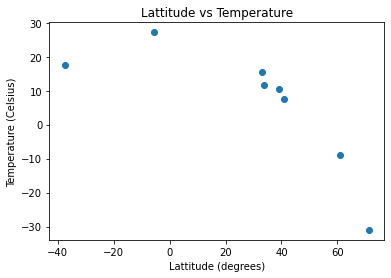

In [25]:
# print("clean_city_data") 
# print(clean_city_data)

# Prepare scatter plot  
plt.scatter(clean_city_data["lat"],clean_city_data["temp"])
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Temperature (Celsius)")
plt.title('Lattitude vs Temperature')
# Save the figure
plt.savefig("output_data/lat_temp.png")
# Display the garph
plt.show()

## Latitude vs. Humidity Plot

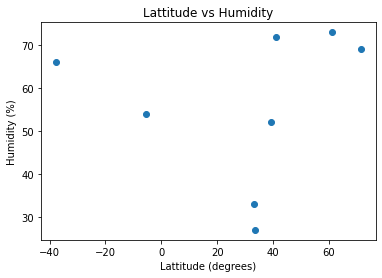

In [26]:
# Prepare scatter plot  
plt.scatter(clean_city_data["lat"],clean_city_data["Humidity"])
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Humidity (%)")
plt.title('Lattitude vs Humidity')
# Save the figure
plt.savefig("output_data/lat_hum.png")
# Display the garph
plt.show()

## Latitude vs. Cloudiness Plot

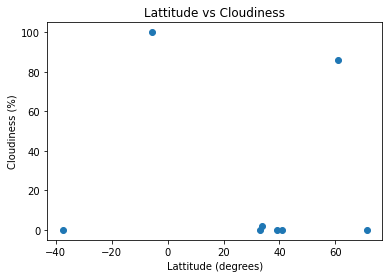

In [27]:
# Prepare scatter plot  
plt.scatter(clean_city_data["lat"],clean_city_data["Cloudiness"])
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Cloudiness (%)")
plt.title('Lattitude vs Cloudiness')
# Save the figure
plt.savefig("output_data/lat_cloud.png")
# Display the garph
plt.show()

## Latitude vs. Wind Speed Plot

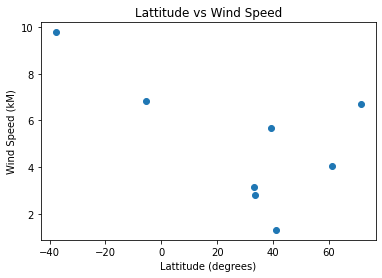

In [28]:
# Prepare scatter plot  
plt.scatter(clean_city_data["lat"],clean_city_data["Wind Speed"])
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Wind Speed (kM)")
plt.title('Lattitude vs Wind Speed')
# Save the figure
plt.savefig("output_data/lat_wind.png")
# Display the garph
plt.show()

## Linear Regression

The correlation between both factors is -0.76
line_eq is: y = -0.39x + 17.77


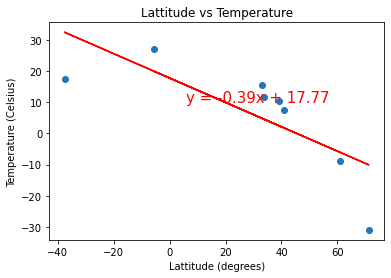

In [29]:
# Calculate the correlation coefficient and linear regression model 

x_values = clean_city_data["lat"]
y_values = clean_city_data["temp"]

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Temperature (Celsius)")
plt.title('Lattitude vs Temperature')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

clean_city_data
   index      city      lat       lon   temp  TempMax  Humidity  Cloudiness  \
0      0     avera  33.1940  -82.5271  15.49    17.08        33           0   
1      1   alcaniz  41.0500   -0.1333   7.58     7.82        72           0   
2      2  hamilton  39.1834  -84.5333  10.37    11.60        52           0   
3      3   sechura  -5.5569  -80.8222  27.20    27.20        54         100   
4      4    barrow  71.2906 -156.7887 -30.99   -30.99        69           0   
5      5     tabas  33.5959   56.9244  11.54    11.54        27           2   
6      6      lebu -37.6167  -73.6500  17.53    17.53        66           0   
7      7    narsaq  60.9167  -46.0500  -8.88    -8.88        73          86   

   Wind Speed  
0        3.17  
1        1.31  
2        5.66  
3        6.84  
4        6.69  
5        2.81  
6        9.78  
7        4.06  

northern_hemisphere_city
[0, 1, 2, 4, 5, 7]

southern_hemisphere_city
[3, 6]

northern_hemisphere_data
   index      city      

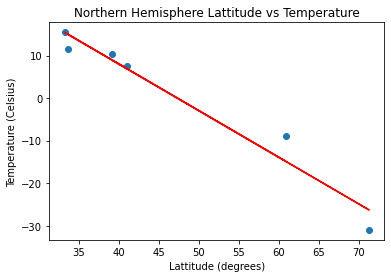

In [30]:
# Separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and 
# Southern Hemisphere (less than 0 degrees latitude)
# After each pair of plots, take the time to explain what the linear regression is modeling. 
# For example, describe any relationships you notice and any other analysis you may have.

# Set-up and initialize variables 
city_counter = 0
northern_city_counter = 0
southern_city_counter = 0
northern_hemisphere_city = []
southern_hemisphere_city = []
      
# Make a new DataFrame equal to the city data (aka weather_data) to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
northern_hemisphere_data = clean_city_data
southern_hemisphere_data = clean_city_data

print("clean_city_data")
print(clean_city_data)
print()

# Create Northen Hemisphere and Southern Hemisphere lists
for city_counter in range(0, len(clean_city_data)):
    if clean_city_data["lat"][city_counter] >= 0:
        #print('northern_hemisphere_city')
        #print(f'Latitude for Northen Hemisphere city {clean_city_data["city"][city_counter]}') 
        #print(' #{city_counter} received is: {lat}')
        ##print(f'Lattitude for city {city[city_counter]} #{city_counter} is Northen Hemisphere: {clean_city_data["lat"][city_counter]}')
        northern_hemisphere_city.append(city_counter)
        #print("northern_hemisphere_city")
        #print(northern_hemisphere_city)
        #print()
        # Drop southern_hemisphere_data point from northern_hemisphere_data    
        southern_hemisphere_data=southern_hemisphere_data.drop(city_counter, inplace=False)
#         print("southern_hemisphere_data")
#         print(southern_hemisphere_data)
#         print()
    else:
        # Southern_hemisphere_city
        southern_hemisphere_city.append(city_counter)
#         print("southern_hemisphere_city")
#         print(southern_hemisphere_city)
#         print()
        # Drop southern_hemisphere_data point from northern_hemisphere_data      
        northern_hemisphere_data=northern_hemisphere_data.drop(city_counter, inplace=False)
#         print("northern_hemisphere_data")
#         print(northern_hemisphere_data)
#         print()

    city_counter += 1 
          
print("northern_hemisphere_city")
print(northern_hemisphere_city)
print()
print("southern_hemisphere_city")
print(southern_hemisphere_city)
print()

print("northern_hemisphere_data")
print(northern_hemisphere_data)
print()
print("southern_hemisphere_data")
print(southern_hemisphere_data)
print()
          

x_values = northern_hemisphere_data["lat"]
y_values = northern_hemisphere_data["temp"]


print("x_values")
print(x_values)
print()
print("y_values")
print(y_values)
print()

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print("slope, intercept, rvalue, pvalue, stderr")
print(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Lattitude (degrees)")
plt.ylabel("Temperature (Celsius)")
plt.title('Northern Hemisphere Lattitude vs Temperature')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

x_values
3    27.20
6    17.53
Name: temp, dtype: float64

y_values
3    -5.5569
6   -37.6167
Name: lat, dtype: float64

The correlation between both factors is 1.0
slope, intercept, rvalue, pvalue, stderr
3.315387797311273 -95.73544808686663 1.0 0.0 0.0
line_eq is: y = 3.32x + -95.74


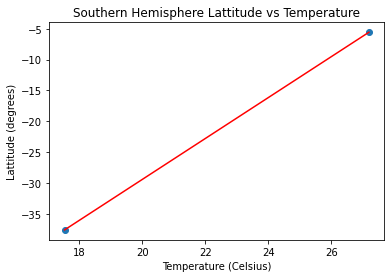

In [31]:
x_values = southern_hemisphere_data["temp"]
y_values = southern_hemisphere_data["lat"]



print("x_values")
print(x_values)
print()
print("y_values")
print(y_values)
print()

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print("slope, intercept, rvalue, pvalue, stderr")
print(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Lattitude (degrees)")
plt.title('Southern Hemisphere Lattitude vs Temperature')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x_values
0    33
1    72
2    52
4    69
5    27
7    73
Name: Humidity, dtype: int64

y_values
0    33.1940
1    41.0500
2    39.1834
4    71.2906
5    33.5959
7    60.9167
Name: lat, dtype: float64

The correlation between both factors is 0.74
slope, intercept, rvalue, pvalue, stderr
0.5712332799999998 15.501425120000011 0.7376930879160736 0.0941833716477729 0.26139615548494666
line_eq is: y = 0.57x + 15.5


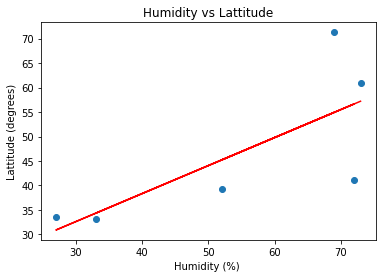

In [32]:
x_values = northern_hemisphere_data["Humidity"]
y_values = northern_hemisphere_data["lat"]


print("x_values")
print(x_values)
print()
print("y_values")
print(y_values)
print()

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print("slope, intercept, rvalue, pvalue, stderr")
print(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Humidity (%) ")
plt.ylabel("Lattitude (degrees)")
plt.title('Humidity vs Lattitude')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x_values
3    54
6    66
Name: Humidity, dtype: int64

y_values
3    -5.5569
6   -37.6167
Name: lat, dtype: float64

The correlation between both factors is -1.0
slope, intercept, rvalue, pvalue, stderr
-2.6716500000000005 138.71220000000002 -1.0 0.0 0.0
line_eq is: y = -2.67x + 138.71


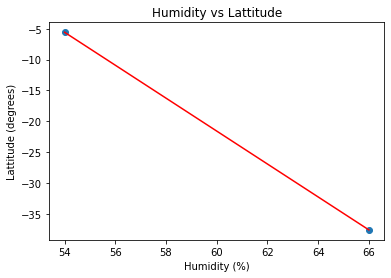

In [33]:
x_values = southern_hemisphere_data["Humidity"]
y_values = southern_hemisphere_data["lat"]


print("x_values")
print(x_values)
print()
print("y_values")
print(y_values)
print()

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print("slope, intercept, rvalue, pvalue, stderr")
print(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Humidity (%)")
plt.ylabel("Lattitude (degrees)")
plt.title('Humidity vs Lattitude')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values
0     0
1     0
2     0
4     0
5     2
7    86
Name: Cloudiness, dtype: int64

y_values
0    33.1940
1    41.0500
2    39.1834
4    71.2906
5    33.5959
7    60.9167
Name: lat, dtype: float64

The correlation between both factors is 0.44
slope, intercept, rvalue, pvalue, stderr
0.19816333478830206 43.63203775643824 0.4382309479960554 0.38473390803550284 0.20322797140267249
line_eq is: y = 0.2x + 43.63


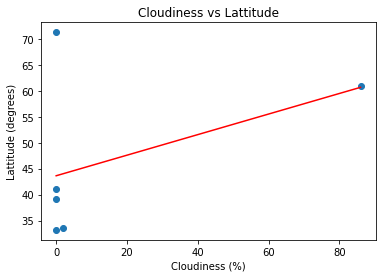

In [34]:
x_values = northern_hemisphere_data["Cloudiness"]
y_values = northern_hemisphere_data["lat"]


print("x_values")
print(x_values)
print()
print("y_values")
print(y_values)
print()

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print("slope, intercept, rvalue, pvalue, stderr")
print(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Lattitude (degrees)")
plt.title('Cloudiness vs Lattitude')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values
3    100
6      0
Name: Cloudiness, dtype: int64

y_values
3    -5.5569
6   -37.6167
Name: lat, dtype: float64

The correlation between both factors is 1.0
slope, intercept, rvalue, pvalue, stderr
0.32059800000000005 -37.6167 1.0 0.0 0.0
line_eq is: y = 0.32x + -37.62


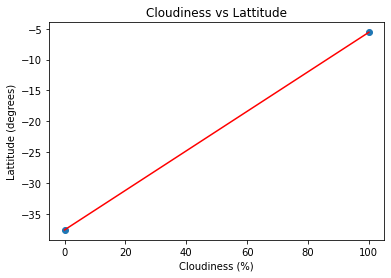

In [35]:
x_values = southern_hemisphere_data["Cloudiness"]
y_values = southern_hemisphere_data["lat"]


print("x_values")
print(x_values)
print()
print("y_values")
print(y_values)
print()

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print("slope, intercept, rvalue, pvalue, stderr")
print(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Lattitude (degrees)")
plt.title('Cloudiness vs Lattitude')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values
0    33
1    72
2    52
4    69
5    27
7    73
Name: Humidity, dtype: int64

y_values
0    33.1940
1    41.0500
2    39.1834
4    71.2906
5    33.5959
7    60.9167
Name: lat, dtype: float64

The correlation between both factors is 0.74
slope, intercept, rvalue, pvalue, stderr
0.5712332799999998 15.501425120000011 0.7376930879160736 0.0941833716477729 0.26139615548494666
line_eq is: y = 0.57x + 15.5


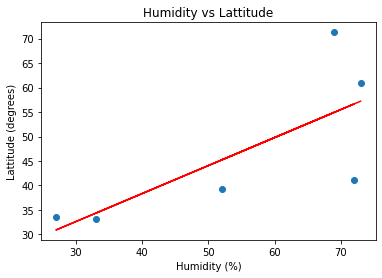

In [36]:
x_values = northern_hemisphere_data["Humidity"]
y_values = northern_hemisphere_data["lat"]


print("x_values")
print(x_values)
print()
print("y_values")
print(y_values)
print()

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print("slope, intercept, rvalue, pvalue, stderr")
print(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Humidity (%)")
plt.ylabel("Lattitude (degrees)")
plt.title('Humidity vs Lattitude')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values
3    54
6    66
Name: Humidity, dtype: int64

y_values
3    -5.5569
6   -37.6167
Name: lat, dtype: float64

The correlation between both factors is -1.0
slope, intercept, rvalue, pvalue, stderr
-2.6716500000000005 138.71220000000002 -1.0 0.0 0.0
line_eq is: y = -2.67x + 138.71


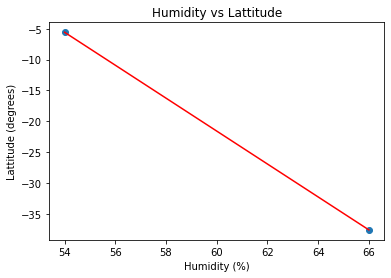

In [37]:
x_values = southern_hemisphere_data["Humidity"]
y_values = southern_hemisphere_data["lat"]


print("x_values")
print(x_values)
print()
print("y_values")
print(y_values)
print()

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Prepare Linear regression and scatter plot data  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
print("slope, intercept, rvalue, pvalue, stderr")
print(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"line_eq is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Humidity (%)")
plt.ylabel("Lattitude (degrees)")
plt.title('Humidity vs Lattitude')

# Display the garph
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()